In [18]:
from torch import empty
from linear import Linear
from tanh import Tanh
from relu import ReLU
from leakyrelu import LeakyReLU
from sgd import SGD, SGD_Sequential
from mse import MSE
from generate_dataset import generate_set
from sequential import Sequential

import math
import torch
torch.set_grad_enabled(False)
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate data:

In [19]:
# ------------------------------------------------------------------
# Control the randomness
# ------------------------------------------------------------------
torch.manual_seed(0)

N = 1000
center = (0.5, 0.5)
r = 1 / (math.sqrt(2 * math.pi))
training_data, training_labels = generate_set(N, center, r)
test_data, test_labels = generate_set(N, center, r)

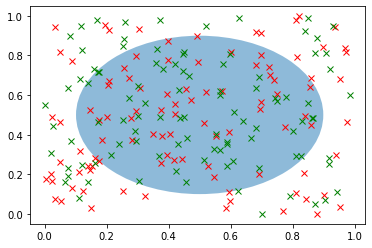

In [20]:
# test my function :) 
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

circle1 = plt.Circle(center, r, alpha = 0.5)
ax.add_patch(circle1)

for point in training_data[:100]:
    ax.plot(point[0], point[1], 'x',color = 'r', label = 'training')
for point in test_data[:100]:
    ax.plot(point[0], point[1], 'x',color = 'g', label = 'test') 

## Set up model:

Builds a network with two input units, two output units, three hidden layers of 25 units

In [21]:
def threshold(x):
    if x > 0:
        return 1
    else:
        return 0

In [22]:
batch_size = 64

m1 = Linear(2, 25)
m2 = Linear(25, 25)
m3 = Linear(25, 25)
m4 = Linear(25, 25)
m5 = Linear(25, 1)

#relu = ReLU()
relu = LeakyReLU(0.1)

tanh = Tanh()

types = [
    'linear1', 'activation1', 'linear2', 'activation2', 'linear3',
    'activation3', 'linear4', 'activation4', 'linear5', 'activation5'
]
s = Sequential([m1, tanh, m2, tanh, m3, tanh, m4, tanh, m5, tanh], types)

# ------------------------------------------------------------------
# forward pass
# ------------------------------------------------------------------
pred = torch.empty(1, batch_size)

for i in range(batch_size):
    pred[0, i] = s.forward(training_data[i, :])[0]

print('# Forward pass on one batch:')
print('# Predictions: \n {}'.format(pred))
print('# True labels: \n {}'.format(training_labels[:batch_size]))

inp = tuple([pred, training_labels[:batch_size]])
m = MSE()
x = m.forward(*inp)
print('# MSE loss of predictions: \n {}'.format(x))

# Backward pass:
lr = 1e-1

# zeroes the gradients as one would do in a training setting
sgd = SGD_Sequential(s.param(), types, lr)
grad_loss = m.backward()

# ------------------------------------------------------------------
# backward pass
# ------------------------------------------------------------------
print('# ------------------------------------------------------------------')
output = s.backward(grad_loss[0])
print('# Backward pass:')
print("Output after backward pass:\n {}".format(output))

# ------------------------------------------------------------------
# Gradient step pass
# ------------------------------------------------------------------
print('# SGD step:')
sgd.step()
print("s params after step {}\n".format(s.param()))

# zeroes the gradients as one would do in a training setting
sgd.zero_grad()
#print("s params after zeroing the gradients {}\n".format(s.param()))

# Forward pass on one batch:
# Predictions: 
 tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
# True labels: 
 tensor([1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
        0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0.,
        1., 1., 0., 0., 1., 1., 1., 1., 0., 1.])
# MSE loss of predictions: 
 0.46875
# ------------------------------------------------------------------
Gradient input of activation5: (tensor(0.9375),)
Gradient of tanh (tensor([2.1589e-14]),)

--Backwards of module linear5
Gradient input of linear module:(tensor([2.1589e-14]),)
Grad wrt w before grad added:[tensor([0., 0., 0., 0., 0., 0., 0., 0., 0

### Training: 

In [26]:
batch_size = 64

m1 = Linear(2, 2)
m2 = Linear(25, 25)
m3 = Linear(25, 25)
m4 = Linear(25, 25)
m5 = Linear(2, 1)

#relu = ReLU()
relu = ParamReLU(0.1)

tanh = Tanh()
types = [
    'linear1', 'activation1', 'linear2', 'activation2'
]
s = Sequential([m1, tanh, m5, tanh], types)

num_epochs = 10

In [27]:
s.print_param()

Module: linear1 
 {'weight': [tensor([[0.0414, 0.9973],
        [0.2227, 0.4012]]), tensor([0.8241, 0.2911])], 'grad': [[], []]}
Module: activation1 
 []
Module: linear2 
 {'weight': [tensor([[0.7307, 0.6921]]), tensor([0.6547])], 'grad': [[], []]}
Module: activation2 
 []


In [28]:
for i in range(1):
    print('\n#---------------------------------------------------')
    print('# RUN:{}'.format(i))
    # ------------------------------------------------------------------
    # forward pass
    # ------------------------------------------------------------------
    pred = torch.empty(1, batch_size)

    for i in range(batch_size):
        pred[0,i] = s.forward(training_data[i,:])[0]

    #print('# Forward pass on one batch:')
    #print('# Predictions: \n {}'.format(pred))
    #print('# True labels: \n {}'.format(training_labels[:batch_size]))

    inp = tuple([pred, training_labels[:batch_size]])
    m = MSE()
    x = m.forward(*inp)
    print('# MSE loss of predictions: \n {}'.format(x))

    # Backward pass:
    lr = 1e-1

    print('\n# Parameters before SGD step:')
    #s.print_param()
    
    # zeroes the gradients as one would do in a training setting
    sgd = SGD_Sequential(s.param(), types, lr)
    grad_loss = m.backward()
    print('\n# Grad loss from MSE: {}'.format(grad_loss))


    # ------------------------------------------------------------------
    # backward pass
    # ------------------------------------------------------------------
    #print('# ------------------------------------------------------------------')
    output = s.backward(grad_loss[0])
    #print('# Backward pass:')
    print("Output after backward pass:\n {}".format(output))

    # ------------------------------------------------------------------
    # Gradient step pass
    # ------------------------------------------------------------------
    #print('# SGD step:')
    sgd.step()
    print("\n# Parameters after SGD step:")
    s.print_param()
    # zeroes the gradients as one would do in a training setting
    sgd.zero_grad()
    #print("s params after zeroing the gradients {}\n".format(s.param()))


#---------------------------------------------------
# RUN:0
# MSE loss of predictions: 
 0.3998693823814392

# Parameters before SGD step:

# Grad loss from MSE: (tensor(0.7886), None)
Gradient input of activation2: (tensor(0.7886),)
Gradient of tanh (tensor([0.1311]),)

--Backwards of module linear2
Gradient input of linear module:(tensor([0.1311]),)
Grad wrt w before grad added:[tensor([0., 0.])]
Grad wrt w after grad added:[tensor([0.1047, 0.0582])]
Grad wrt b before grad added:[tensor(0.)]
Grad wrt b after grad added:[tensor(0.1311)]

--Backwards of module activation1
Gradient of tanh (tensor([0.0159, 0.0151]),)

--Backwards of module linear1
Gradient input of linear module:(tensor([0.0159, 0.0151]),)
Grad wrt w before grad added:[tensor([[0., 0.],
        [0., 0.]])]
Grad wrt w after grad added:[tensor([[0.0060, 0.0041],
        [0.0057, 0.0039]])]
Grad wrt b before grad added:[tensor([0., 0.])]
Grad wrt b after grad added:[tensor([0.0159, 0.0151])]
Output after backward pass:
 